In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
BASE_DIR = "../input/titanic/"
TRAIN_PATH = BASE_DIR + "train.csv"
GENDER_RATH = BASE_DIR + "gender_submission.csv"
TEST_PATH = BASE_DIR + "test.csv"

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

print("=<train_df>=" + "=" *100)
display(train_df.head())
print("...")
display(train_df.tail())
print("="*100, "\n")

=<train_df>=====================================================================================================


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# male → 0, female→1 に変換
#Sex列の各値をlanbda式のxに代入している
#lambdaがif文処理なので、xに対してif文処理が実行されている
train_df["Sex_num"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)
test_df["Sex_num"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)
#test_df.Sex_num = test_df.sex.apply(lambda x: 0 if x == "male" else 1) 
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [4]:
#isnull関数は欠損値の箇所をtrueに変換する
#sumは列ごとにカウントする、true=1としてカウントされるので、個数
print("TRAIN_DF\n")
display(train_df.isnull().sum())

###isnullを可視化
train_df_null_true = train_df.isnull()
display(train_df_null_true)

print("\n", "="*30, "\n")
print("TEST_DF\n")
display(test_df.isnull().sum())

TRAIN_DF



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_num          0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False




TEST_DF



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_num          0
dtype: int64

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
# うまく利用できそうな特徴量を探索する
train_df.Name[:50]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [7]:
# 身分が高い人の非難が優先されている可能性がある
train_df["Initial"] = 0
train_df["Initial"] = train_df.Name.str.extract("([A-Za-z]+)\.")
train_df["Initial"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [8]:
initial_cross = pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient(cmap="Wistia")
initial_cross

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [9]:
# 同じ意味や階級を示す単語が複数あるので、一つに統一する
train_df["Initial"] = train_df["Initial"].replace(["Mlle",  "Mme",   "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer",   "Col",   "Rev", "Capt", "Sir", "Don"],
                            ["Miss", "Miss", "Miss", "Mr",    "Mr",  "Mrs",      "Mrs",    "Other", "Other", "Other",   "Mr",  "Mr", "Mr"])
pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient(cmap="Wistia")

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


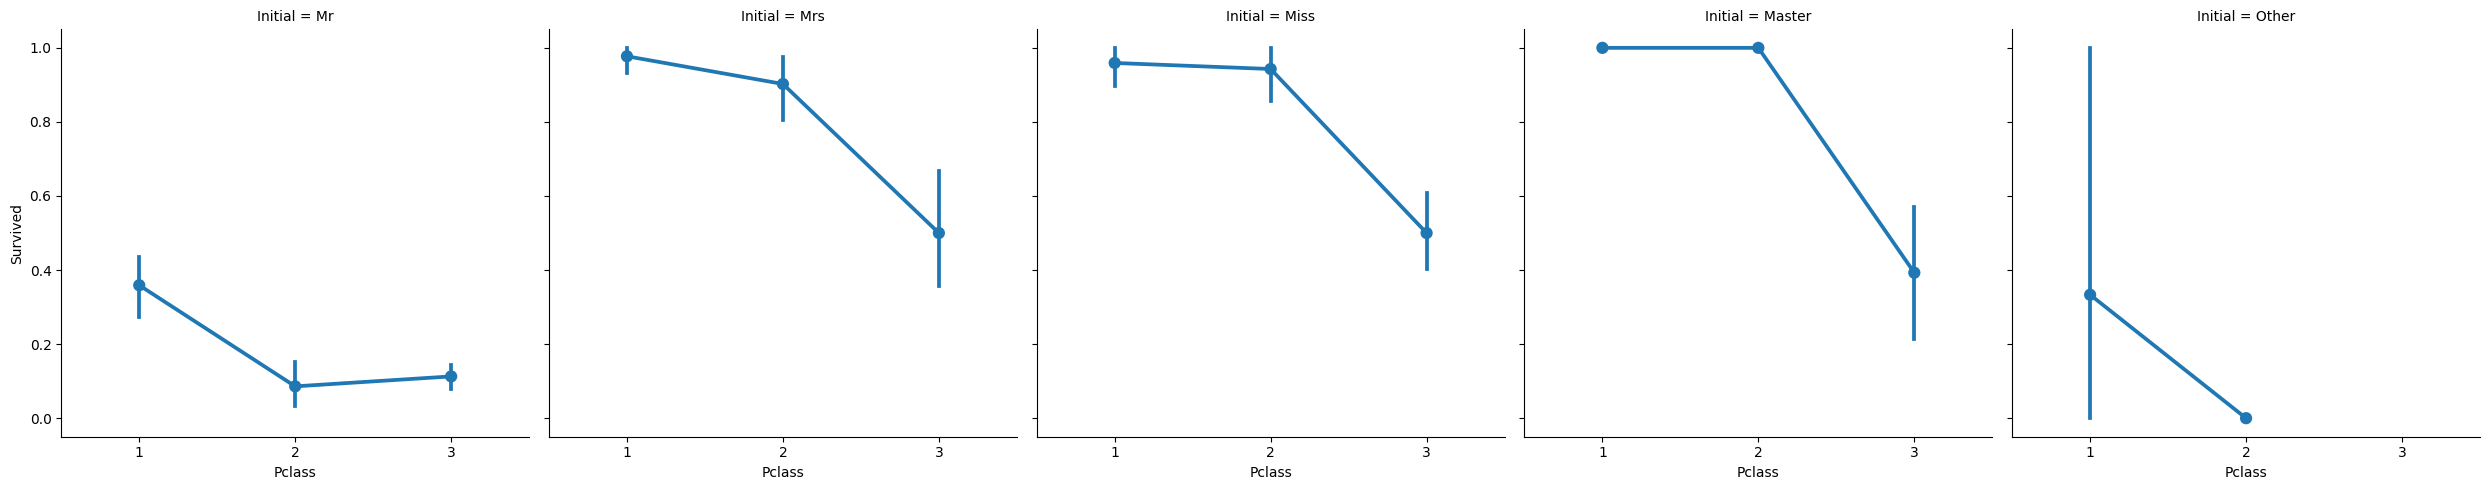

In [10]:
# Survivedの平均値を描画
sns.catplot(x="Pclass", y="Survived", col="Initial", data=train_df, kind="point")
#plt.savefig("Ratio_of_Survived_by_Pclass_and_Initial.png")
plt.show()

MrsでPclass=1, 2は高確率で生存

MissでPclass=1, 2の人は高確率で生存

MasterでPclass=1, 2の人は高確率で生存

Mrは全体的に死ぬ確率が高い

In [11]:
#学習のために文字データを数字に変換
train_df["Initial_num"] = train_df["Initial"].map({"Master":0, "Mr":1, "Miss":2, "Mrs":3, "Other":4})

In [12]:
# チケットとキャビンの分析

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Initial
count,891,891,891,204,889,891
unique,891,2,681,147,3,5
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Mr
freq,1,577,7,4,644,529


In [13]:
train_df["Cabin"].isnull().sum()

687

チケットは値の種類が681種類であり、文字列と数字が混在しているので今回は扱わない
cabinもアルファベット部分の頭文字だけ扱えば有効活用できそうだが欠損値が多いので今回は使わない

In [14]:
# scikit-learnで簡単な予測モデルを作成する
test_df["Initial"] = 0
for i in train_df:
    test_df["Initial"] = test_df.Name.str.extract("([A-Za-z]+)\.")
    
Initial_cross = pd.crosstab(test_df.Initial, test_df.Sex).T
display(Initial_cross)
# test_dataにのみ含まれているDonaも追加
test_df["Initial"] = test_df["Initial"].replace(["Mlle",  "Mme",   "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer",   "Col",   "Rev", "Capt", "Sir", "Don", "Dona"],
                                                ["Miss", "Miss", "Miss", "Mr",    "Mr",  "Mrs",      "Mrs",    "Other", "Other", "Other",   "Mr",  "Mr", "Mr" , "Other"])

initial_cross = pd.crosstab(test_df.Initial, test_df.Sex).T
display(Initial_cross)

test_df["Initial_num"] = test_df["Initial"].map({"Master": 0, "Mr":1, "Miss": 2, "Mrs": 3, "Other":4})


#欠損値は一番乗船した人が多いS港で乗船したと仮定して扱う
train_df["Embarked"] = train_df["Embarked"].fillna("S")
#map関数でdataframeに辞書のキーと同じ値があった場合、そのキーの値に変換
#S→0, C→1, Q→2に変換
train_df["Embarked"] = train_df["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test_df["Embarked"] = test_df["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

#テストデータに欠損値が一つあるので、中央値で埋めておく
#inplace:元のデータに反映させたい場合:True
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [15]:
# 学習データの中から検証データを作成
#  モデルへの入力データに欠損があるとエラーになってしまうので欠損地の数を確認
print("=<train>=" + "="*200)
display(train_df.isnull().sum())
display(train_df)

print("\n=<test>=" + "="*200)
display(test_df.isnull().sum())
display(test_df)

=<train>=========================================================================================================================================================================================================


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Sex_num          0
Initial          0
Initial_num      0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Initial,Initial_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,Other,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1,Miss,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,Mr,1



=<test>=========================================================================================================================================================================================================


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Sex_num          0
Initial          0
Initial_num      0
dtype: int64

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Initial,Initial_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,Mrs,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,1,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1,1,Other,4
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,0,0,Mr,1


In [16]:
# train_test_spritでデータを分割
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_df, test_size=0.2, shuffle=True)

print("train_df : ", train_df.shape)
print("valid_df : ", valid_df.shape)

train_df :  (712, 15)
valid_df :  (179, 15)


In [17]:
# 学習データ
X_train = valid_df.drop(["Survived", "PassengerId", "Cabin", "Ticket", "Name", "Sex", "Initial", "Age"], axis=1)
Y_train = valid_df.Survived
# テストデータ
X_test = test_df.drop(["PassengerId","Cabin", "Ticket", "Name", "Sex", "Initial", "Age"], axis=1)

print("X_train shape :", X_train.shape)
print("Y_train shape :", Y_train.shape)
print("X_test :", X_test.shape)

X_train shape : (179, 7)
Y_train shape : (179,)
X_test : (418, 7)


In [18]:
# 検証データ
X_valid = valid_df.drop(["Survived", "PassengerId", "Cabin", "Ticket", "Name", "Sex", "Initial", "Age"], axis=1)
Y_valid = valid_df["Survived"]

print("X_valid shape :", X_valid.shape)
print("Y_valid shape : ", Y_valid.shape)

X_valid shape : (179, 7)
Y_valid shape :  (179,)


In [19]:
print("学習データ")
display(X_train.isna().sum())
display(Y_train.isna().sum())
print("検証データ")
display(X_valid.isna().sum())
display(Y_valid.isna().sum())
print("テストデータ")
display(X_test.isna().sum())

学習データ


Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_num        0
Initial_num    0
dtype: int64

0

検証データ


Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_num        0
Initial_num    0
dtype: int64

0

テストデータ


Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_num        0
Initial_num    0
dtype: int64

正解率 : 84.36


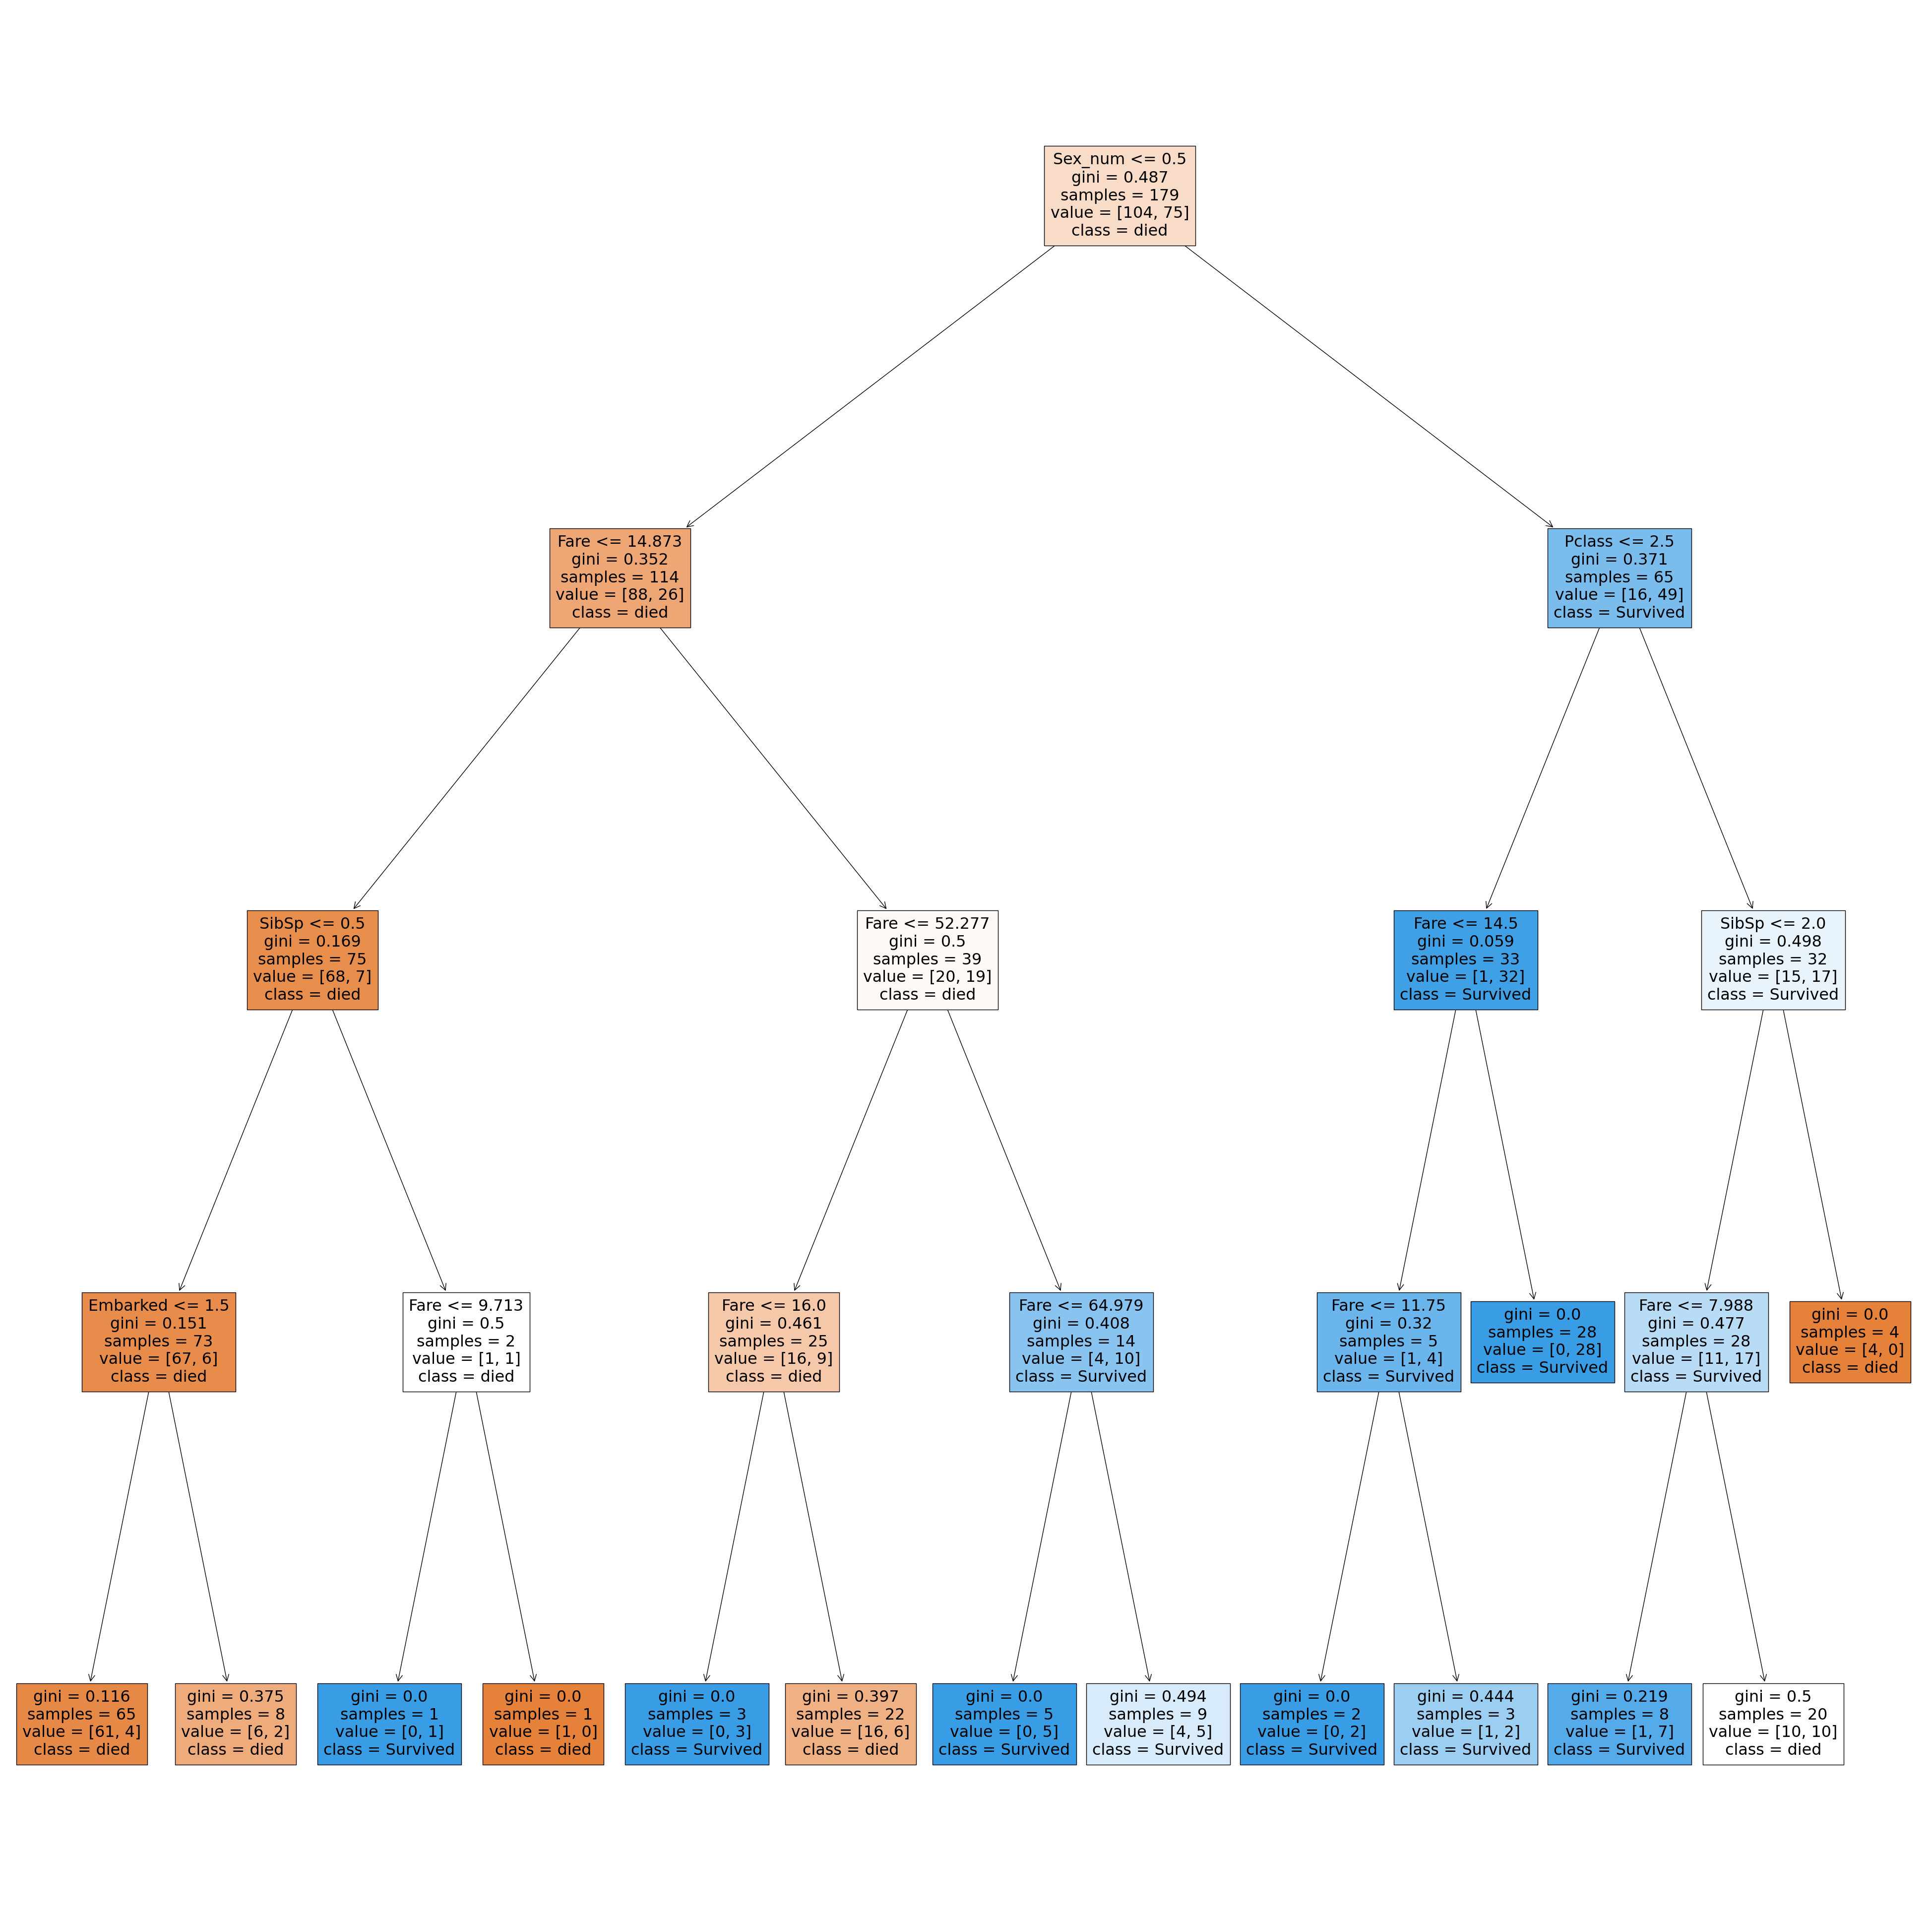

In [20]:
# 決定木の活用

from sklearn.tree import DecisionTreeClassifier, plot_tree

# オブジェクト生成
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, Y_train)#学習

Y_pred = decision_tree.predict(X_test)#予測
accuracy_decision_tree = round(decision_tree.score(X_valid, Y_valid)*100, 2)#評価
print("正解率 :", accuracy_decision_tree)

# 決定木を可視化
plt.figure(figsize=(50, 50))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=["died", "Survived"], filled=True)
plt.show()

In [21]:
# 分類精度がよくなるように自動で木の高さ(max_depth)も決定できる
decision_tree = DecisionTreeClassifier()#オブジェクト作成
decision_tree.fit(X_train, Y_train)#学習
decision_tree.predict(X_test)#予測
accuracy_decision_tree = round(decision_tree.score(X_valid, Y_valid)*100, 2)#正解率
print("正解率 :", accuracy_decision_tree)
print("木の深さ　:", decision_tree.get_depth())

正解率 : 96.09
木の深さ　: 11


In [22]:
# k近傍法アルゴリズム
import random
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) #オブジェクト生成
knn.fit(X_train, Y_train) #学習
Y_pred_knn = knn.predict(X_test) #予測
accuracy_knn = round(knn.score(X_train, Y_train)*100, 2)# 評価
print("正解率 :", accuracy_knn)

正解率 : 87.15


In [23]:
# パーセプトロン
from sklearn.linear_model import Perceptron

perceptron = Perceptron()#オブジェクト作成
perceptron.fit(X_train, Y_train)#学習
accuracy_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)#評価(正解率)
print("正解率 : ", accuracy_perceptron)

正解率 :  67.04


In [24]:
submission = pd.DataFrame({
    "PassengerId" : test_df["PassengerId"],
    "Survived": Y_pred_knn
})

display(submission.head())

submission.to_csv("submission.csv", index=False)#データフレームをcsvファイル化

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
